In [ ]:
#INference of image quality

In [ ]:
!pip install -q datasets transformers

     |████████████████████████████████| 362 kB 5.2 MB/s 
     |████████████████████████████████| 4.4 MB 55.1 MB/s 
     |████████████████████████████████| 212 kB 46.1 MB/s 
     |████████████████████████████████| 101 kB 5.8 MB/s 
     |████████████████████████████████| 140 kB 75.0 MB/s 
     |████████████████████████████████| 1.1 MB 47.9 MB/s 
     |████████████████████████████████| 596 kB 71.4 MB/s 
     |████████████████████████████████| 127 kB 49.5 MB/s 
     |████████████████████████████████| 6.6 MB 40.4 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 271 kB 60.3 MB/s 
     |████████████████████████████████| 144 kB 70.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import torch

In [ ]:
import transformers
transformers.__version__


'4.20.1'

In [ ]:
torch.__version__


'1.12.0+cu113'

In [ ]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
repo_name = r"./models/DiT_model0"

feature_extractor = AutoFeatureExtractor.from_pretrained(repo_name)
model = AutoModelForImageClassification.from_pretrained(repo_name)

OSError: ignored

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from transformers import pipeline

pipe = pipeline("image-classification", "shivarama23/swin-tiny-patch4-window7-224-finetuned-image_quality")

In [ ]:
pipe = pipeline("image-classification", 
                model=model,
                feature_extractor=feature_extractor)

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.listdir('/content/gdrive/MyDrive/image_quality/test_folder')

['good', 'bad']

In [ ]:
from PIL import Image
image_folder = r'/content/gdrive/MyDrive/image_quality/test_folder'
category_list = ["good", "bad"]
predicted_labels = []
gt_labels = []
for category_ in category_list:
  image_list = os.listdir(os.path.join(image_folder, category_))
  for image_ in image_list:
    image_path = os.path.join(image_folder, category_, image_)
    image = Image.open(image_path)
    output = pipe(image)[0]['label']
    predicted_labels.append(output)
    gt_labels.append(category_)
    print('pred:', output, 'actual:', category_, 'image_name:', image_)
    

pred: good actual: good image_name: web_good_65.jpg
pred: good actual: good image_name: web_good_71.jpg
pred: good actual: good image_name: web_good_4.jpg
pred: good actual: good image_name: web_good_57.png
pred: good actual: good image_name: clinical_notes_good_1.png
pred: bad actual: good image_name: M_Img_WP_D1_L2_r35_a-5_b10.jpg
pred: good actual: good image_name: web_good_102.png
pred: good actual: good image_name: web_good_3.png
pred: good actual: good image_name: clinical_notes_good_2.jpg
pred: good actual: good image_name: web_good_26.jpg
pred: good actual: good image_name: web_good_34.png
pred: good actual: good image_name: web_good_75.png
pred: good actual: good image_name: web_good_5.png
pred: good actual: bad image_name: web_bad_7.png
pred: bad actual: bad image_name: S_Img_WP_D27_L2_r35_a0_b0_Mb2.jpg
pred: bad actual: bad image_name: web_bad_23.jpg
pred: bad actual: bad image_name: web_bad_24.jpg
pred: good actual: bad image_name: web_bad_103.jpg
pred: bad actual: bad imag

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(gt_labels, predicted_labels, labels=category_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_list)

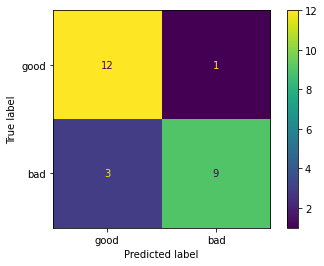

In [ ]:
disp.plot()